In [7]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seawater as sw
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features
import uuid
from scipy import interpolate
from glob import glob

#create xarray dataset with saildrone filenames
#data directory for saildrone data
data_dir = 'C:/Users/gentemann/Google Drive/public/2019_saildrone/ATOMIC/saildrone_usv_data/'
saildrone_filenames = [x for x in glob(data_dir+'saildrone*.nc')]

#data direcgtory for temperature logger .csv files
data_dir = 'C:/Users/gentemann/Google Drive/public/2019_saildrone/ATOMIC/temp_log_proc/'
#adir_sbe='F:/data/cruise_data/saildrone/2020_atomic/temp_log_proc/'

#get list of all filenames in directory
logger_filenames = [x for x in glob(data_dir+'*1_min*.nc')]
#print('number of file:',len(files))
#print(files)




In [12]:
iusv=1
#open both files
fname=saildrone_filenames[iusv]
ds_usv=xr.open_dataset(fname)
ds_usv.close()
print(fname)
fname=logger_filenames[iusv]
print(fname)
ds_logger=xr.open_dataset(fname)
ds_logger.close()
#swap dims to time since obs makes no sense
ds_usv = ds_usv.isel(trajectory=0).swap_dims({'obs':'time'})
ds_logger = ds_logger.isel(trajectory=0).swap_dims({'obs':'time'})
ds_usv['wspd']=np.sqrt(ds_usv.UWND_MEAN**2+ds_usv.VWND_MEAN**2)

#calculate local time
xlon=ds_usv.longitude
time_offset_to_lmt=(xlon.data/360.)*24.*60
ds_usv['tlmt'] = ds_usv.time.data+time_offset_to_lmt*np.timedelta64(1,'m')# dt.timedelta(seconds=1)


C:/Users/gentemann/Google Drive/public/2019_saildrone/ATOMIC/saildrone_usv_data\saildrone-gen_5-atomic_eurec4a_2020-sd1060-20200117T000000-20200302T235959-1_minutes-v1.1589306886594.nc
C:/Users/gentemann/Google Drive/public/2019_saildrone/ATOMIC/temp_log_proc\temperature_loggers-atomic_eurec4a_2020-sd1060-20200117T000000-20200302T235959-1_minute-v1.nc


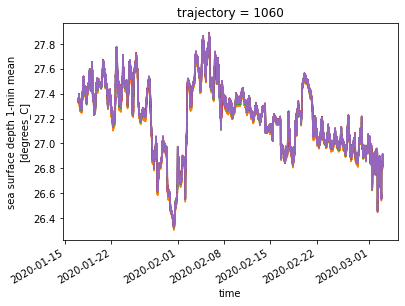

In [13]:
ds_usv.TEMP_SBE37_MEAN.plot()
ds_usv.TEMP_CTD_RBR_MEAN.plot()
ds_logger.sea_water_temperature_00_mean.plot()
ds_logger.sea_water_temperature_01_mean.plot()
ds_logger.sea_water_temperature_02_mean.plot()
ds_logger.sea_water_temperature_03_mean.plot()

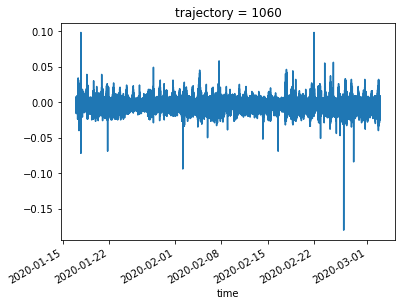

In [4]:
dif = ds_logger.sea_water_temperature_00_mean-ds_logger.sea_water_temperature_03_mean
#dif = ds_usv.TEMP_SBE37_MEAN-ds_usv.TEMP_CTD_RBR_MEAN
dif.plot()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 5.000e+00,
        1.000e+01, 4.000e+00, 8.000e+00, 9.000e+00, 1.300e+01, 1.200e+01,
        1.500e+01, 1.900e+01, 1.400e+01, 1.900e+01, 2.000e+01, 1.600e+01,
        2.700e+01, 3.800e+01, 2.700e+01, 5.000e+01, 5.600e+01, 5.700e+01,
        9.700e+01, 8.200e+01, 1.190e+02, 1.520e+02, 1.730e+02, 1.820e+02,
        2.380e+02, 2.370e+02, 2.360e+02, 2.780e+02, 3.440e+02, 3.510e+02,
        4.130e+02, 3.790e+02, 4.240e+02, 4.640e+02, 4.910e+02, 5.310e+02,
        5.710e+02, 6.130e+02, 6.150e+02, 7.350e+02, 7.310e+02, 8.440e+02,
        9.010e+02, 9.450e+02, 1.026e+03, 1.110e+03, 1.218e+03, 1.187e+03,
        1.446e+03, 1.442e+03, 1.539e+03, 1.651e+03, 1.741e+03, 1.819e+03,
        1.845e+03, 1.958e+03, 2.017e+0

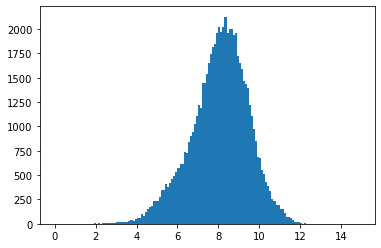

In [5]:
plt.hist(ds_usv.wspd,bins=np.arange(0,15,.1))

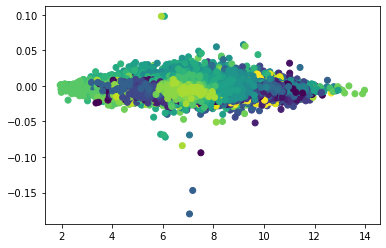

In [6]:
plt.scatter(ds_usv.wspd,dif,c=ds_usv.tlmt.dt.hour)

# calculate mean difference between salinity sensors

In [57]:
dd=[]
for iusv in range(3):
    fname=saildrone_filenames[iusv]
    ds_usv=xr.open_dataset(fname)
    ds_usv.close()
    dif = ds_usv.SAL_SBE37_MEAN-ds_usv.SAL_RBR_MEAN
    difm = dif.mean().data
    difs = dif.std().data
    print(iusv,"{:.2f}".format(difm),"{:.2f}".format(difs),np.isfinite(dif).sum().data)
    if iusv==0:
        dd=ds_usv.SAL_SBE37_MEAN.data
    else:
        dd = np.concatenate([dd,ds_usv.SAL_SBE37_MEAN.data])
print("{:.2f}".format(np.nanmean(dd)),"{:.2f}".format(np.nanstd(dd)),np.isfinite(dd).sum())
    

0 0.05 0.00 66183
1 0.06 0.01 66183
2 0.06 0.01 66183
35.87 0.60 198549


In [60]:
saildrone_filenames

['C:/Users/gentemann/Google Drive/public/2019_saildrone/ATOMIC/saildrone_usv_data\\saildrone-gen_5-atomic_eurec4a_2020-sd1026-20200117T000000-20200302T235959-1_minutes-v1.1589306725934.nc',
 'C:/Users/gentemann/Google Drive/public/2019_saildrone/ATOMIC/saildrone_usv_data\\saildrone-gen_5-atomic_eurec4a_2020-sd1060-20200117T000000-20200302T235959-1_minutes-v1.1589306886594.nc',
 'C:/Users/gentemann/Google Drive/public/2019_saildrone/ATOMIC/saildrone_usv_data\\saildrone-gen_5-atomic_eurec4a_2020-sd1061-20200117T000000-20200302T235959-1_minutes-v1.1589307121602.nc']

<xarray.DataArray ()>
array(66183)
Coordinates:
    trajectory  <U4 '1061'

In [38]:
print((ds_usv.SAL_SBE37_MEAN-ds_usv.SAL_RBR_MEAN).mean().data,(ds_usv.SAL_SBE37_MEAN-ds_usv.SAL_RBR_MEAN).std().data)

0.05917901575933398 0.014108336142514553


In [37]:
print((ds_usv.SAL_SBE37_MEAN).mean().data,(ds_usv.SAL_SBE37_MEAN).std().data)

35.90623525376608 0.6009664537453041
